# Coffee Shop Sales Analysis Project

#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Loading Dataset

In [2]:
df=pd.read_csv('coffee_shop_sales.csv')
df.sample(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
144964,145301,6/27/2023,9:13:39,2,8,Hell's Kitchen,56,2.55,Tea,Brewed Chai tea,Spicy Eye Opener Chai Rg
116740,117002,6/3/2023,15:23:04,2,3,Astoria,54,2.50,Tea,Brewed Chai tea,Morning Sunrise Chai Rg
62860,63030,4/10/2023,12:10:18,1,5,Lower Manhattan,36,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg
61484,61654,4/9/2023,7:52:13,1,5,Lower Manhattan,78,5.63,Bakery,Scone,Scottish Cream Scone
144109,144446,6/26/2023,11:30:49,2,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg
137445,137782,6/20/2023,16:44:10,1,8,Hell's Kitchen,79,3.75,Bakery,Scone,Jumbo Savory Scone
74043,74213,4/23/2023,12:19:34,1,8,Hell's Kitchen,41,4.25,Coffee,Barista Espresso,Cappuccino Lg
52960,53067,3/28/2023,17:19:52,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg
56827,56938,4/3/2023,12:31:00,2,3,Astoria,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg
71509,71679,4/20/2023,10:22:33,2,8,Hell's Kitchen,53,3.00,Tea,Brewed Chai tea,Traditional Blend Chai Lg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [4]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [5]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

### Feature Engineering

In [6]:
# Convert date and time columns to a single datetime object
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'] + ' ' + df['transaction_time'], 
                                            format='%m/%d/%Y %H:%M:%S')

In [ ]:
# Calculate sales
df['sales']=df['transaction_qty']*df['unit_price']

In [9]:
# Extract time-based features for analysis
df['month_num']=df['transaction_datetime'].dt.month
df['month_name']=df['transaction_datetime'].dt.strftime('%B')
df['day_of_week']=df['transaction_datetime'].dt.day_name()
df['day_num']=df['transaction_datetime'].dt.day
df['hour']=df['transaction_datetime'].dt.hour

In [10]:
# Segment into weekday vs. weekend
df['day_type']=df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [11]:
print("\nData preparation complete. New features created.")
print(df[['transaction_datetime','sales','month_name','day_of_week','hour','day_type']].head())


Data preparation complete. New features created.
  transaction_datetime  sales month_name day_of_week  hour day_type
0  2023-01-01 07:06:11    6.0    January      Sunday     7  Weekend
1  2023-01-01 07:08:56    6.2    January      Sunday     7  Weekend
2  2023-01-01 07:14:04    9.0    January      Sunday     7  Weekend
3  2023-01-01 07:20:24    2.0    January      Sunday     7  Weekend
4  2023-01-01 07:22:41    6.2    January      Sunday     7  Weekend


### Total Sales, Orders, and Quantity Analysis (Monthly)

In [12]:
# Grouping monthly to calculate metrics
monthly_analysis=df.groupby(['month_num','month_name']).agg(
    total_sales=('sales','sum'),
    total_orders=('transaction_id','nunique'), # Use nunique for distinct orders
    total_quantity_sold=('transaction_qty','sum')
).reset_index().sort_values('month_num')

In [14]:
# Calculate Month-on-Month (MoM) change
monthly_analysis['sales_change']=monthly_analysis['total_sales'].pct_change()*100
monthly_analysis['orders_change']=monthly_analysis['total_orders'].pct_change()*100
monthly_analysis['quantity_change']=monthly_analysis['total_quantity_sold'].pct_change()*100

In [16]:
# Calculate the difference from the previous month
monthly_analysis['sales_diff']=monthly_analysis['total_sales'].diff()
monthly_analysis['orders_diff']=monthly_analysis['total_orders'].diff()
monthly_analysis['quantity_diff']=monthly_analysis['total_quantity_sold'].diff()

In [17]:
# Display the results table
print(monthly_analysis.to_string())

   month_num month_name  total_sales  total_orders  total_quantity_sold  sales_change  orders_change  quantity_change  sales_mom_diff  orders_mom_diff  quantity_mom_diff  sales_diff  orders_diff  quantity_diff
0          1    January     81677.74         17314                24870           NaN            NaN              NaN             NaN              NaN                NaN         NaN          NaN            NaN
1          2   February     76145.19         16359                23550     -6.773633      -5.515768        -5.307600        -5532.55           -955.0            -1320.0    -5532.55       -955.0        -1320.0
2          3      March     98834.68         21229                30406     29.797667      29.769546        29.112527        22689.49           4870.0             6856.0    22689.49       4870.0         6856.0
3          4      April    118941.08         25335                36469     20.343466      19.341467        19.940143        20106.40           4106.0          

### Important Visual Charts

#### Sales Analysis by Weekdays and Weekends

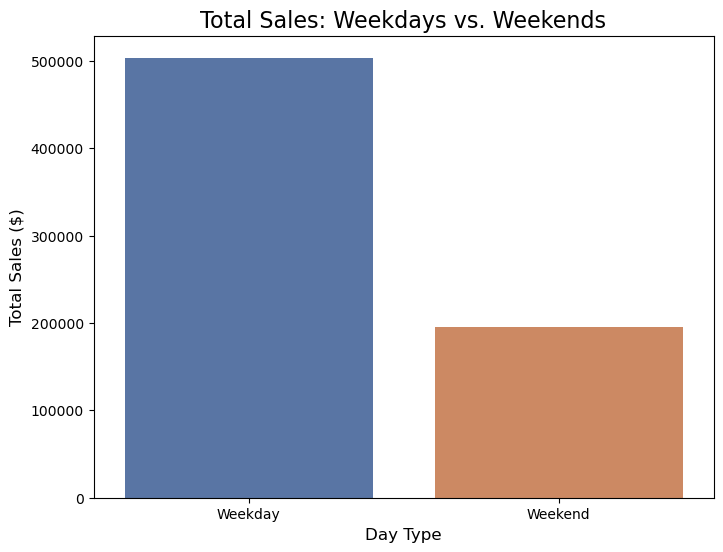

In [34]:
sales = df.groupby('day_type')['sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    x='day_type',
    y='sales',
    data=sales,
    palette=['#4c72b0', '#dd8452'],
    hue='day_type',
    legend=False
)
plt.title('Total Sales: Weekdays vs. Weekends', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation
plt.show()

#### Sales Analysis by Store Location

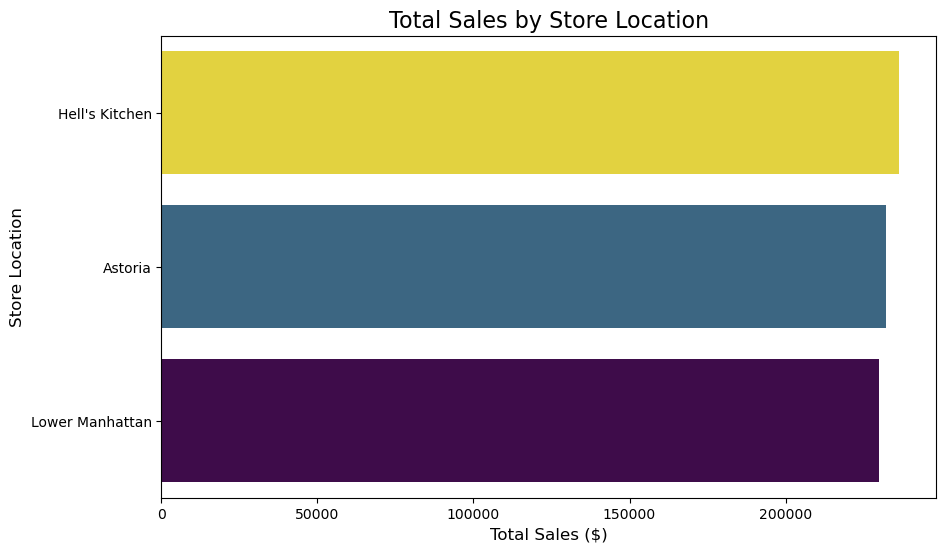

In [33]:
store_sales=df.groupby('store_location')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='sales',
    y='store_location',
    data=store_sales,
    palette='viridis',
    orient='h',
    hue='sales',
    legend=False
)
plt.title('Total Sales by Store Location', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Store Location', fontsize=12)
plt.show()

#### Daily Sales Analysis


--- Generating Daily Sales Analysis with Average Line for June ---


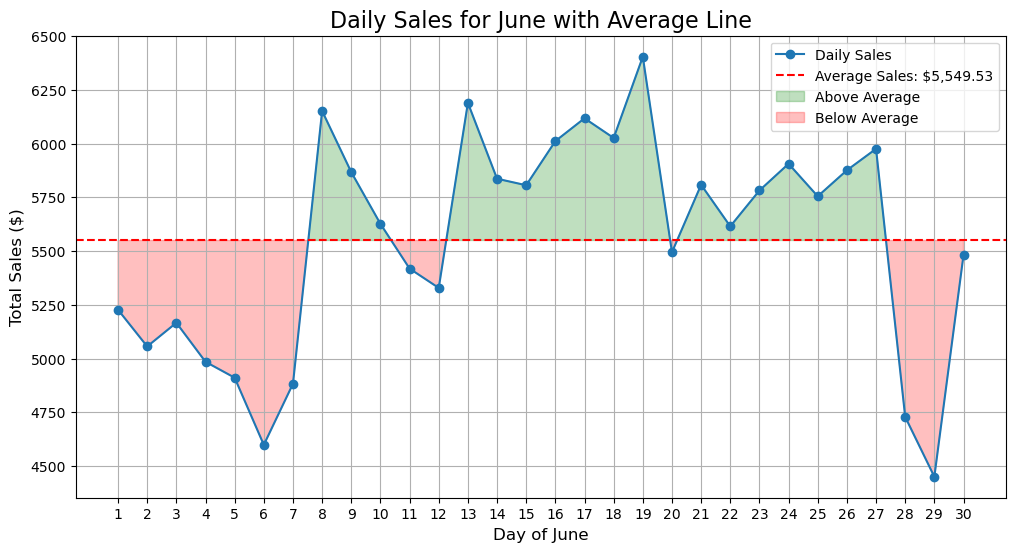

In [22]:
print("\n--- Generating Daily Sales Analysis with Average Line for June ---")
daily_sales_june = june_data.groupby('day_num')['sales'].sum().reset_index()
average_sales_june = daily_sales_june['sales'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales_june['day_num'], daily_sales_june['sales'], marker='o', linestyle='-', label='Daily Sales')
plt.axhline(y=average_sales_june, color='r', linestyle='--', label=f'Average Sales: ${average_sales_june:,.2f}')

# Highlight days above/below average
plt.fill_between(
    daily_sales_june['day_num'],
    daily_sales_june['sales'],
    average_sales_june,
    where=(daily_sales_june['sales'] > average_sales_june),
    interpolate=True,
    color='green',
    alpha=0.25,
    label='Above Average'
)
plt.fill_between(
    daily_sales_june['day_num'],
    daily_sales_june['sales'],
    average_sales_june,
    where=(daily_sales_june['sales'] <= average_sales_june),
    interpolate=True,
    color='red',
    alpha=0.25,
    label='Below Average'
)

plt.title('Daily Sales for June with Average Line', fontsize=16)
plt.xlabel('Day of June', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(daily_sales_june['day_num'])
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Example of MoM difference for a selected month (e.g., June vs May)
sales_may=df[df['month_name']=='May'].groupby('store_location')['sales'].sum()
sales_june=df[df['month_name']=='June'].groupby('store_location')['sales'].sum()
mom_diff_stores=(sales_june - sales_may).reset_index(name='mom_diff')
print("\nMoM Sales Difference (June vs. May) by Store:")
print(mom_diff_stores)


MoM Sales Difference (June vs. May) by Store:
    store_location  mom_diff
0          Astoria   2654.35
1   Hell's Kitchen   4358.15
2  Lower Manhattan   2745.62


#### Sales Analysis by Product Category

In [27]:
print("\n--- Generating Sales Analysis by Product Category ---")
category_sales = df.groupby('product_category')['sales'].sum().reset_index()

fig_pie_category = px.pie(
    category_sales,
    names='product_category',
    values='sales',
    title='Sales Distribution by Product Category',
    hole=0.3,
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig_pie_category.update_traces(textposition='inside', textinfo='percent+label')
fig_pie_category.update_layout(showlegend=False)
fig_pie_category.show()


--- Generating Sales Analysis by Product Category ---


#### Top 10 Products by Sales

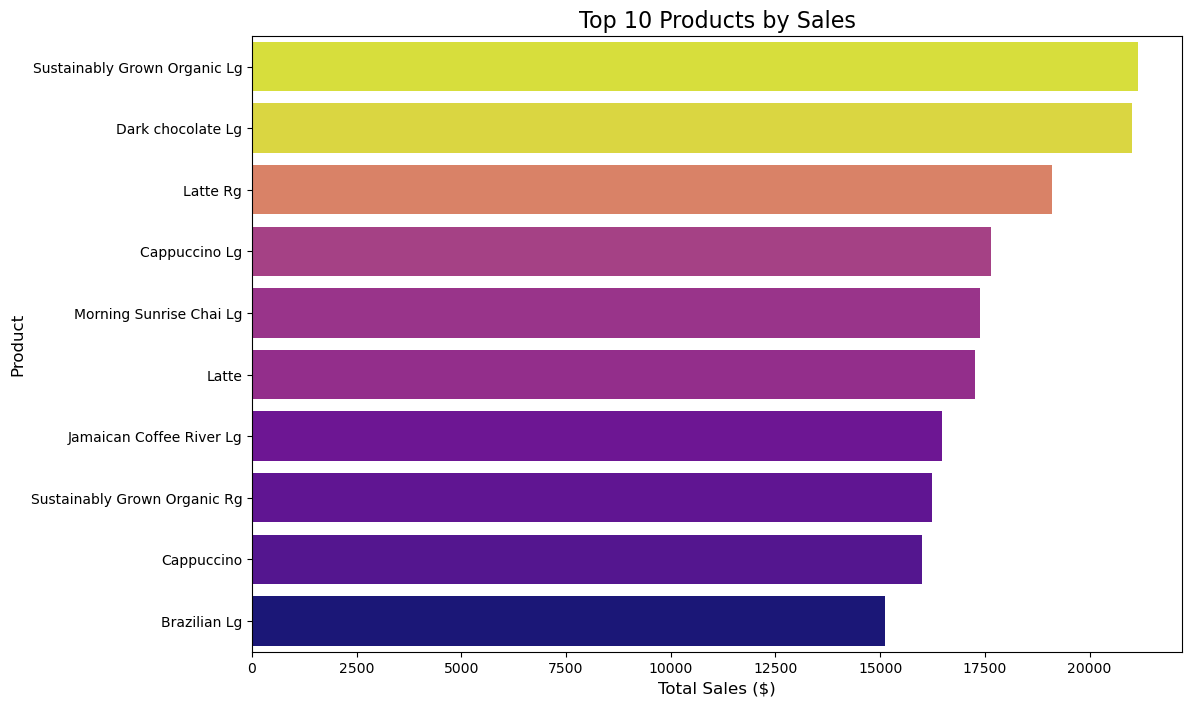

In [32]:
top_10=df.groupby('product_detail')['sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    x='sales',
    y='product_detail',
    data=top_10,
    palette='plasma',
    orient='h',
    hue='sales',
    legend=False
)
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

#### Sales Analysis by Days and Hours

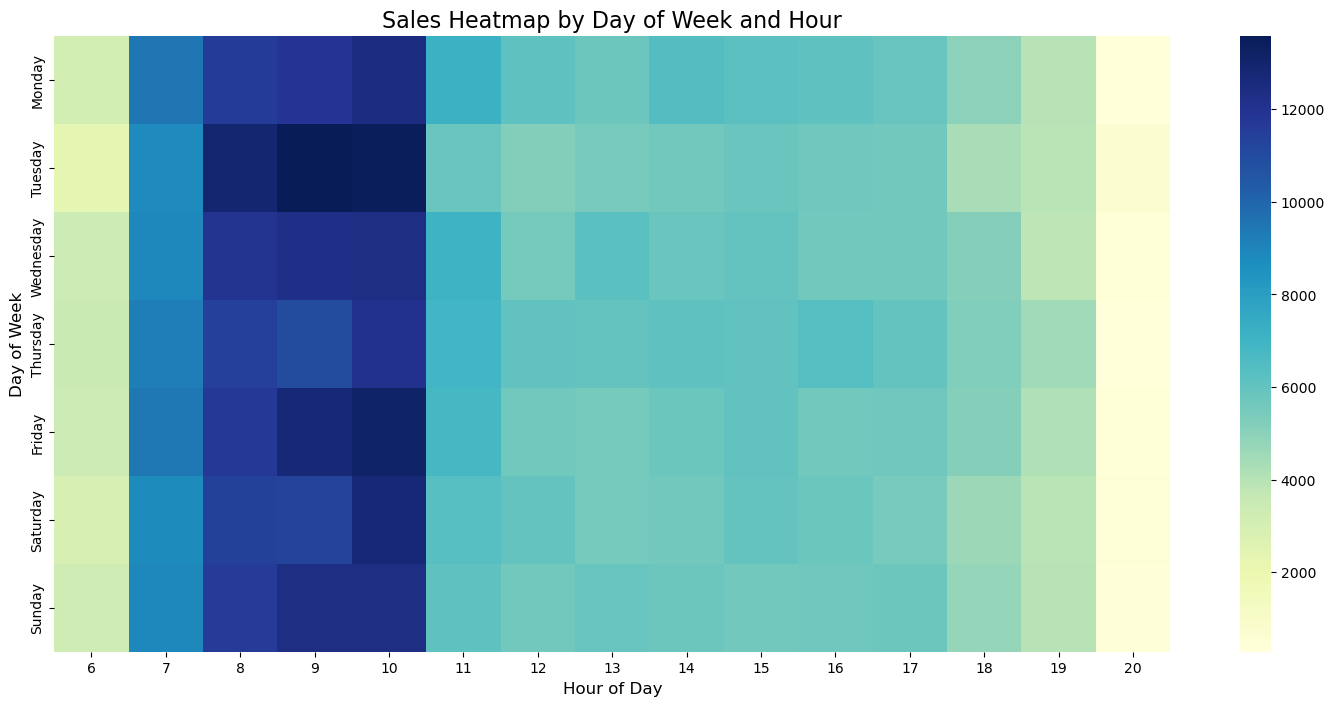

In [36]:
day_hour_sales=df.pivot_table(
    index='day_of_week',
    columns='hour',
    values='sales',
    aggfunc='sum'
)
# Order the days of the week correctly
day_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_hour_sales=day_hour_sales.reindex(day_order)

plt.figure(figsize=(18, 8))
sns.heatmap(
    day_hour_sales,
    cmap='YlGnBu',
    annot=False, 
    fmt=".0f"
)
plt.title('Sales Heatmap by Day of Week and Hour',fontsize=16)
plt.xlabel('Hour of Day',fontsize=12)
plt.ylabel('Day of Week',fontsize=12)
plt.show()